In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.feature as cf
import cartopy.crs as ccrs
import datetime as dt
from pynmet import inmet

In [2]:
est = pd.read_csv('/home/lucas/estacoes.csv')

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


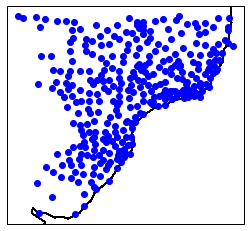

In [33]:
est = est[(est.lat<=-15)&(est.lat>=-50)]
for i,j in zip(est.lat, est.lon):
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.plot(j,i,'bo')

In [4]:
date1 = dt.datetime(2020,6,30,0)
date2 = dt.datetime(2020,6,30,12)
dates = [date1,date2]

In [35]:
for i, codigo in enumerate(est.codigo.values):
    print(inmet(codigo))

Empty DataFrame
Columns: [Temperatura, Temperatura_max, Temperatura_min, Umidade, Umidade_max, Umidade_min, Ponto_orvalho, Ponto_orvalho_max, Ponto_orvalho_min, Pressao, Pressao_max, Pressao_min, Vento_velocidade, Vento_direcao, Vento_rajada, Radiacao, Precipitacao]
Index: []
Empty DataFrame
Columns: [Temperatura, Temperatura_max, Temperatura_min, Umidade, Umidade_max, Umidade_min, Ponto_orvalho, Ponto_orvalho_max, Ponto_orvalho_min, Pressao, Pressao_max, Pressao_min, Vento_velocidade, Vento_direcao, Vento_rajada, Radiacao, Precipitacao]
Index: []
Empty DataFrame
Columns: [Temperatura, Temperatura_max, Temperatura_min, Umidade, Umidade_max, Umidade_min, Ponto_orvalho, Ponto_orvalho_max, Ponto_orvalho_min, Pressao, Pressao_max, Pressao_min, Vento_velocidade, Vento_direcao, Vento_rajada, Radiacao, Precipitacao]
Index: []
Empty DataFrame
Columns: [Temperatura, Temperatura_max, Temperatura_min, Umidade, Umidade_max, Umidade_min, Ponto_orvalho, Ponto_orvalho_max, Ponto_orvalho_min, Pressao,

AttributeError: 'str' object has no attribute 'date'

In [36]:
from tqdm.notebook import tqdm
for date in tqdm(dates):
    ano, mes, dia, hora, minut, sec = date.year, date.month, date.day, date.hour, date.minute, date.second
    formato_data = '{:04}{:02}{:02}{:02d}{:02d}{:02d}'.format(ano, mes, dia, hora, minut, sec)
    
    for i, codigo in enumerate(est.codigo.values):

        
        try:
            d = inmet(codigo)
            c1 = d.iloc[:, [0,3,6,9,12,13,16]].loc['2020-06-30 {:02d}:00:00'.format(hora)]        
            pressao = c1['Pressao']
            tk = c1['Temperatura'] + 273.15
            tdk = c1['Ponto_orvalho'] + 273.15
            wspd = c1['Vento_velocidade']
            wdir = c1['Vento_direcao']
            umid = c1['Umidade']
            precipit = c1['Precipitacao']


            lat = est.lat.values[i]
            lon = est.lon.values[i]
            codigo = est.codigo.values[i]
            nome = est.nome.values[i]
            alt = est.alt.values[i]
            print('{} {} {} {} FM-12 SYNOP HOURLY_PWV.LLH {} 0 0 0 0 0 F F F 0 36 {} -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0\n'.format(lat,lon,codigo,nome,elevation,formato_data))
            print('{} 0 {} 0 {} 0 {} 0  {} 0 {} 0 -888888.00000 0 -888888.00000 0 {} 0-888888.00000 0\n'.format(pressao,alt,tk,tdk,wspd,wdir,umid))

        except:
            pass

-32.07878 -52.167738 A802 Rio Grande FM-12 SYNOP HOURLY_PWV.LLH 1161 0 0 0 0 0 F F F 0 36 20200630000000 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0

1016.1 0 5 0 286.84999999999997 0 284.95 0  2.2 0 90.0 0 -888888.00000 0 -888888.00000 0 88.0 0-888888.00000 0

-29.72496 -53.720468999999994 A803 Santa Maria FM-12 SYNOP HOURLY_PWV.LLH 1161 0 0 0 0 0 F F F 0 36 20200630000000 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0 -888888.00000 0

999.7 0 103 0 284.25 0 283.84999999999997 0  2.6 0 113.0 0 -888888.00000 0 -888888.00000 0 97.0 0-888888.00000 0

-28.126991999999998 -49.47961 A845 Morro da Igreja (Bom Jardim da Serra) FM-12 SYNOP HOURLY_PWV.LLH 1161 0 0 0 0 0 F F F 0 36 2020063000